# Ex4 - Emily Tseng (et397)

## 1) Presidential Election Simulation I

In [132]:
import numpy as np 
from election_data import mean_std, results2016
from scipy.stats import norm
from matplotlib import pyplot as plt


### A) 

In [68]:
def tally_votes(mean_std, results_dict, bias=0.):
    """
        Runs the analysis specified in part A).
        Input:
            mean_std
            results
            bias: Random correlated bias to add for B)
        Output:
            (
                enum('Clinton', 'Trump'), 
                <int> c_votes,
                <int> t_votes,
            )
    """
    c_votes = 0
    t_votes = 0
    for state in mean_std.keys():
        # Run for Maine and Nebraska statewide values only
        if ' District' in state:
            continue
        val = norm.rvs(mean_std[state][0], mean_std[state][1])
        val += bias
        if 'Maine' in state:
            state = 'Maine'
        if 'Nebraska' in state:
            state = 'Nebraska'
        votes = results_dict[state]['electoral_votes']
        if val <= 0.5: #clinton wins
            c_votes += votes
        elif val > 0.5: #trump wins
            t_votes += votes
    # Declare winner for this trial
    winner = ''
    if c_votes >= 270 and t_votes < 270:
        winner = 'C'
    elif c_votes == t_votes:
        winner = 'TIE'
    elif c_votes < 270 and t_votes >= 270:
        winner = 'T'
    if winner == '':
        print(c_votes, t_votes)
    return (winner, c_votes, t_votes)

In [69]:
# Run simulation n times
def simulate(n):
    c = {
        'runs': 0,
        'votes': []
    }

    t = {
        'runs': 0,
        'votes': []
    }

    ties = {
        'runs': 0,
        'votes': []
    }

    for it in range(0, n):
        totals = tally_votes(mean_std, results2016)
        if totals[0] == 'C':
            c['runs'] += 1
        elif totals[0] == 'T':
            t['runs'] += 1
        else:
            ties['runs'] += 1
        c['votes'].append(totals[1])
        t['votes'].append(totals[2])

    # Analyze
    c_pct = float(c['runs'] / n)*100
    c_exp = sum(c['votes']) / len(c['votes'])
    t_pct = float(t['runs'] / n)*100
    t_exp = sum(t['votes']) / len(t['votes'])
    print('Clinton won {}pct of {} trials, with an expected electoral vote total of {}'.format(c_pct, n, c_exp))
    print('Trump won {}pct of {} trials, with an expected electoral vote total of {}'.format(t_pct, n, t_exp))

In [73]:
# Get pct of trials won by each candidate, plus expectation of number of electoral votes
simulate(10000)

Clinton won 87.58pct of 10000 trials, with an expected electoral vote total of 301.2394
Trump won 11.67pct of 10000 trials, with an expected electoral vote total of 236.7606


## B)

In [71]:
def simulate_b(n):
    c = {
        'runs': 0,
        'votes': []
    }

    t = {
        'runs': 0,
        'votes': []
    }

    ties = {
        'runs': 0,
        'votes': []
    }

    for it in range(0, n):
        bias = norm.rvs(0, .016)
        totals = tally_votes(mean_std, results2016, bias)
        if totals[0] == 'C':
            c['runs'] += 1
        elif totals[0] == 'T':
            t['runs'] += 1
        else:
            ties['runs'] += 1
        c['votes'].append(totals[1])
        t['votes'].append(totals[2])

    # Analyze
    c_pct = float(c['runs'] / n)*100
    c_exp = sum(c['votes']) / len(c['votes'])
    t_pct = float(t['runs'] / n)*100
    t_exp = sum(t['votes']) / len(t['votes'])
    print('Clinton won {}pct of {} trials, with an expected electoral vote total of {}'.format(c_pct, n, c_exp))
    print('Trump won {}pct of {} trials, with an expected electoral vote total of {}'.format(t_pct, n, t_exp))

In [74]:
simulate_b(10000)

Clinton won 72.02pct of 10000 trials, with an expected electoral vote total of 300.5981
Trump won 27.36pct of 10000 trials, with an expected electoral vote total of 237.4019


## C)

In [75]:
def simulate_c(n, bias_loc, bias_size):
    c = {
        'runs': 0,
        'votes': []
    }

    t = {
        'runs': 0,
        'votes': []
    }

    ties = {
        'runs': 0,
        'votes': []
    }

    for it in range(0, n):
        bias = norm.rvs(bias_loc, bias_size)
        totals = tally_votes(mean_std, results2016, bias)
        if totals[0] == 'C':
            c['runs'] += 1
        elif totals[0] == 'T':
            t['runs'] += 1
        else:
            ties['runs'] += 1
        c['votes'].append(totals[1])
        t['votes'].append(totals[2])

    # Analyze
    c_pct = float(c['runs'] / n)*100
    c_exp = sum(c['votes']) / len(c['votes'])
    t_pct = float(t['runs'] / n)*100
    t_exp = sum(t['votes']) / len(t['votes'])
    print('With norm.rvs({},{})...'.format(bias_loc, bias_size))
    print('Clinton won {}pct of {} trials, with an expected electoral vote total of {}'.format(c_pct, n, c_exp))
    print('Trump won {}pct of {} trials, with an expected electoral vote total of {}'.format(t_pct, n, t_exp))

In [78]:
simulate_c(10000, 0.01, 0.01)

With norm.rvs(0.01,0.01)...
Clinton won 53.32pct of 10000 trials, with an expected electoral vote total of 273.5635
Trump won 45.58pct of 10000 trials, with an expected electoral vote total of 264.4365


In [79]:
simulate_c(10000, 0.015, 0.01)

With norm.rvs(0.015,0.01)...
Clinton won 39.4pct of 10000 trials, with an expected electoral vote total of 260.4166
Trump won 59.5pct of 10000 trials, with an expected electoral vote total of 277.5834


## 2) Presidential Election Simulation II

In [81]:
def tally_popular_votes(mean_std, results_dict, bias=0.):
    c_elec = 0
    c_pop = 0
    t_elec = 0
    t_pop = 0
    for state in mean_std.keys():
        # Run for Maine and Nebraska statewide values only
        if ' District' in state:
            continue
        val = norm.rvs(mean_std[state][0], mean_std[state][1])
        val += bias
        if 'Maine' in state:
            state = 'Maine'
        if 'Nebraska' in state:
            state = 'Nebraska'
        elec_votes = results_dict[state]['electoral_votes']
        if val <= 0.5: #clinton wins
            c_elec += elec_votes
        elif val > 0.5: #trump wins
            t_elec += elec_votes
        t_pop += (results_dict[state]['vote_total'] * val)
        c_pop += (results_dict[state]['vote_total'] * (1-val))
    # Declare winner for this trial
    if c_elec >= 270 and t_elec < 270:
        winner = 'C'
    elif c_elec == t_elec:
        winner = 'TIE'
    elif c_elec < 270 and t_elec >= 270:
        winner = 'T'
    return (winner, c_elec, c_pop, t_elec, t_pop)

In [153]:
def simulate_2(n, sigma):
    blowouts = []
    obama = []
    narrow = []
    trump = []
    for it in range(n):
        bias = norm.rvs(0, sigma)
        winner, c_elec, c_pop, t_elec, t_pop = tally_popular_votes(mean_std, results2016, bias)
        margin = ((c_pop - t_pop) / (c_pop + t_pop)) * 100
        if winner == 'C' and margin >= 8.:
            blowouts.append(margin)
        elif winner == 'C' and margin >= 4.:
            obama.append(margin)
        elif winner == 'C':
            narrow.append(margin)
        elif winner == 'T':
            trump.append(margin)
    return blowouts, obama, narrow, trump

n = 10000
blowouts, obama, narrow, trump = simulate_2(n, 0.016)
print('Chance of a Clinton blowout:{}\nChance of Clinton win in "Obama zone":{}\nChance of a narrow Clinton win:{}\nChance of Trump win:{}'.format(len(blowouts)/n, len(obama)/n, len(narrow)/n, len(trump)/n))

Chance of a Clinton blowout:0.0963
Chance of Clinton win in "Obama zone":0.3482
Chance of a narrow Clinton win:0.2806
Chance of Trump win:0.2676


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


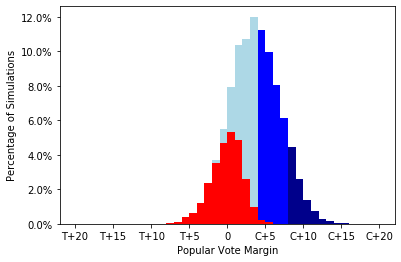

In [154]:
from matplotlib.ticker import PercentFormatter

def plot_pop_margins(*args):
    weights = list()
    total = 0
    for arg in args:
        weights.append(np.ones(len(arg)))
        total += len(arg)
    weights = np.array(weights)
    weights /= total

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1,)
    
    ax.hist(args,
        color=['red', 'darkblue', 'blue', 'lightblue'], 
        histtype='barstacked',
        range=(-20,20),
        bins=40,
        weights=weights,
    )
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.ylabel('Percentage of Simulations')
    plt.xlabel('Popular Vote Margin')

    new_labels = list()
    for label in ax.get_xticks():
        if label == 0:
            new_labels.append('0')
        elif label < 0:
            new_labels.append('T+{:.0f}'.format(label*-1))
        elif label > 0:
            new_labels.append('C+{:.0f}'.format(label))
    ax.set_xticklabels(new_labels)
    fig.show()

plot_pop_margins(trump, blowouts, obama, narrow)

## 3) Presidential Election Simulation III